## Loan Approval Prediction

In [1]:
# Import relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle as pk


In [2]:
# Loading Dataset

df = pd.read_csv(r"loan_approval_dataset.csv")


In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Data Preparation 

In [5]:
# Dropping least relevant columns from the dataset
df.drop(columns = ['loan_id'], inplace = True)

In [6]:
# Removing extra spaces from the database
df.columns = df.columns.str.strip()

In [7]:
# Combining all assets into one column
df['assets'] = (df['residential_assets_value'] + df['commercial_assets_value']+ df['luxury_assets_value']+ df['bank_asset_value'])

In [8]:
columns_to_drop = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
df.drop(columns = columns_to_drop, inplace = True)


In [9]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [10]:
# Convert categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['education','self_employed','loan_status' ]

# applying label encode to each column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

print(df)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          0              0       9600000     29900000   
1                    0          1              1       4100000     12200000   
2                    3          0              0       9100000     29700000   
3                    3          0              0       8200000     30700000   
4                    5          1              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          0              1       1000000      2300000   
4265                 0          1              1       3300000     11300000   
4266                 2          1              0       6500000     23900000   
4267                 1          1              0       4100000     12800000   
4268                 1          0              0       9200000     29700000   

      loan_term  cibil_score  loan_status    assets

## Model Building


In [12]:
# Splitting data
x = df.drop(columns = ['loan_status'])
y = df['loan_status']


In [13]:
# split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, stratify=y)

In [14]:
# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

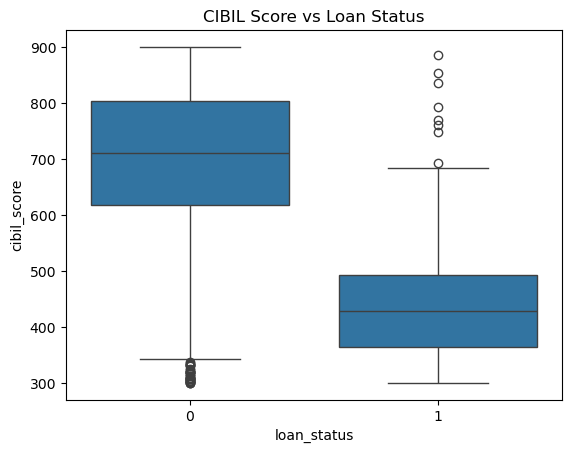

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score vs Loan Status')
plt.show()

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.1)

In [16]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Calculate VIF
# def calculate_vif(x_train_scaled):
#     vif_data = pd.DataFrame()
#     vif_data['Feature'] = x.columns
#     vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x_train_scaled.shape[1])]
#     return vif_data

# # Calculate VIF for the training data
# vif_result = calculate_vif(x_train_scaled)
# print(vif_result)

In [17]:
# Implementing model and training the dataset

model = LogisticRegression(random_state= 42)
model.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 93.09133489461358%


In [19]:
# Saving the model
with open('model.pkl', 'wb') as model_file:
    pk.dump(model,model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pk.dump(scaler,scaler_file)

In [22]:
correlation = df.corr()['loan_status'].sort_values(ascending=False)
print(correlation)

loan_status         1.000000
loan_term           0.113036
no_of_dependents    0.018114
income_annum        0.015189
assets              0.011281
education           0.004918
self_employed      -0.000345
loan_amount        -0.016150
cibil_score        -0.770518
Name: loan_status, dtype: float64
